In [18]:
from QHD import *

import matplotlib.pyplot as plt
import numpy as np

# Tunneling Through A Gaussian Potential

### 1. The Potential

**Parameters**

$A = 8000 cm^{(-1)}$

$\sigma = 0.1 angrstrom$

**Potential**

$V(q)=A*e^{(-\sigma q^2)}$

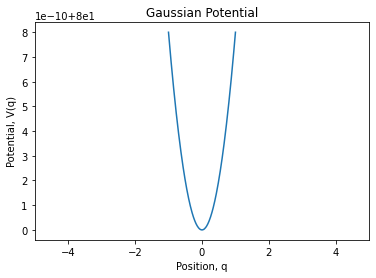

In [20]:
### Might change to regular potential ###

def gaussian_potential(A, sigma):
    return (A*np.exp(sigma*q**2))

A = 8000 * 10**(-2)
sigma = 0.1 * 10**(-10)

q = np.linspace(-1, 1, 1000)
plt.plot(q, gaussian_potential(A, sigma))
plt.title("Gaussian Potential")
plt.xlim(-5, 5)
plt.xlabel("Position, q")
plt.ylabel("Potential, V(q)")
plt.savefig("gaussian_vVq.png")
plt.show()

### 2. Derivation of  QHD formulas

The q expression:

q = dt*p/mass + q

q2 = dt*(2.0*q*p/mass + 1/mass) + q**2


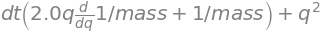

In [3]:
q, p, mass, dt = symbols("q p mass dt")

print("q = " + str(QHD_int(q, 1, dt)) + "\n")

print("q2 = " + str(QHD_int(q, 2, dt)).replace("Derivative(1, q)", "p"))

QHD_int(q, 2, dt)

**2.1 Taking the derivative in Python**

We can do a change of variable in the potential to:

$$x=e^{-\sigma q**2}$$

And so:

$$V(q)=A*x$$

We will now take the first and second derivatives of the original potential, and then perform the change of variables:

In [4]:
gaussian_potential = A*exp(sigma*q**2)

In [5]:
sigma, q, A = symbols("sigma, q, A")

diff1 = diff(gaussian_potential, q)

diff1

In [6]:
sigma, q, A = symbols("sigma, q, A")

diff2 = diff(diff1, q)

diff2

In [7]:
x = Symbol("x")

diff11 = diff1.replace(exp(q**2*sigma), x).replace(A, 1)

diff11

In [8]:
diff22 = diff2.replace(exp(q**2*sigma), x).replace(A, 1)

diff22

The p expressions:

In [9]:
p,x,x2,dt,mass,alpha,D = symbols("p,x,x2,dt,mass,alpha,D")

QHD_p = sympify(str(QHD_int(p, 1, dt)).replace("Derivative(v(q), q)", str(diff11)))

print("p = " + str(QHD_p) + "\n")

QHD_p2 = sympify(str(QHD_int(p, 2, dt)).replace("Derivative(v(q), (q, 2))", str(diff22)).replace("Derivative(v(q), q)", str(diff11)))

print("p2 = " + str(QHD_p2) + "\n")

p = -1.6e-9*dt*q*exp(1.0e-11*q**2) + p

p2 = dt*(6.4e-9*p*q*exp(1.0e-11*q**2) + 6.4e-20*q**2*exp(1.0e-11*q**2) + 1.6e-9*exp(1.0e-11*q**2)) + p**2



### 3. Plot position versus time

In [10]:
### Time how long it takes to compute ###

import time 
begin = time.time()

### Parameters: ###

q0 = 0.15
p0 = 0.0
s0 = 0.05
ps0 = 0.0


D = 4.419
mass = 1836
A = 8000 * 10**(-2)
sigma = 0.1 * 10**(-10)
hbar = 0.6582  # eV * fs
y_list = []

Etot = 0.0
Etot0 = 0.0
Etot_cl = 0.0
Etot_cl0 = 0.0
q,p,pq,q2,p2,x,x2,xp,xq = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
q, p = q0, p0
q2 = q*q + s0*s0
pq = ps0*s0 + q*p
p2 = p*p + ps0*ps0 + (0.5*hbar/s0)**2
x = exp(-sigma*q**2) #exp(-alpha*q0)*exp(0.5*alpha*alpha*s0*s0)
#x2 = #exp(-2.0*alpha*q0)*exp(2.0*alpha*alpha*s0*s0)
#xq = #x*(q-alpha*s0*s0)
#xp = #x*(p - s0*ps0*alpha)

### Compute the y values ###

dt = 0.1
t = 0.0
T = 1000

y_list = []

while t <= T:
    x = exp(q2*sigma) + 0.2*q2*sigma**2*exp(q2*sigma)/mass + 0.2*q*sigma*exp(q2*sigma)*p/mass + 0.1*sigma*exp(q2*sigma)/mass
    
    q = dt*p/mass + q 
    
    q2 = dt*(2.0*q*p/mass + 1/mass) + q**2

#    p = 2*dt*q*sigma*x + p
    p = -2*dt*q*sigma*x + p

#    p2 = dt*(-8.0*p*q*sigma*x + 8.0*q**2*sigma**2*x - 2*sigma*x) + p**2
    p2 = dt*(8.0*p*q*sigma*x + 8.0*q**2*sigma**2*x + 2*sigma*x) + p**2

    t = t + dt
    
    y_list.append(q)
    
time.sleep(1)
# store end time
end = time.time()
  
# total time taken
print(f"Total runtime is {end - begin}")

Total runtime is 101.76786184310913


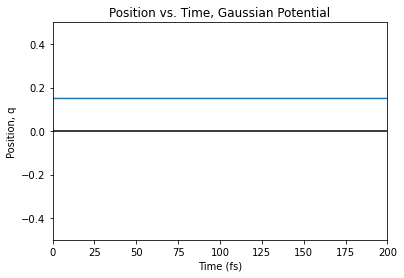

In [17]:
### Define the x values ###

x_list = np.arange(0, 1000, 0.1)
plt.plot(x_list, y_list)
plt.plot([0, 500], [0, 0], "k-")
plt.title("Position vs. Time, Gaussian Potential")
plt.xlim(0, 200)
plt.xlabel("Time (fs)")
plt.ylim(-0.5, 0.5)
plt.ylabel("Position, q")
plt.savefig('gaussian_qVt.png')
plt.show()

In [37]:
sigma, q = symbols("sigma, q")

x = exp(sigma*q**2)

x

In [39]:
print(QHD_int(x, 1, dt))

exp(q**2*sigma) + 0.2*q**2*sigma**2*exp(q**2*sigma)/mass + 0.2*q*sigma*exp(q**2*sigma)*Derivative(1, q)/mass + 0.1*sigma*exp(q**2*sigma)/mass


In [14]:
QHD_int(q, 2, dt)